In [83]:
import pandas as pd
#!pip install prophet
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
from prophet.plot import plot_cross_validation_metric


In [84]:
datasetName = "yahoo_stock.csv"
dataset = pd.read_csv(datasetName, sep=',', encoding='latin-1', usecols=[0,1,2,3,4,5,6], names=['Date', 'High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], header=0)

display(dataset.head())
print(dataset.shape)

trianData = pd.DataFrame(dataset, columns=['Date','Adj Close'])

display(trianData.head())
print(trianData.shape)

,Date,High,Low,Open,Close,Volume,Adj Close
0,2015-11-23,2095.610107,2081.389893,2089.409912,2086.590088,3.587980e+09,2086.590088
1,2015-11-24,2094.120117,2070.290039,2084.419922,2089.139893,3.884930e+09,2089.139893
2,2015-11-25,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
3,2015-11-26,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
4,2015-11-27,2093.290039,2084.129883,2088.820068,2090.110107,1.466840e+09,2090.110107


(1825, 7)


,Date,Adj Close
0,2015-11-23,2086.590088
1,2015-11-24,2089.139893
2,2015-11-25,2088.870117
3,2015-11-26,2088.870117
4,2015-11-27,2090.110107


(1825, 2)


In [85]:
model = Prophet(daily_seasonality=True)
model.fit(trianData.rename(columns={"Date": "ds", "Adj Close": "y"}))

17:58:05 - cmdstanpy - INFO - Chain [1] start processing
17:58:06 - cmdstanpy - INFO - Chain [1] done processing


In [86]:
future = model.make_future_dataframe(periods=365)
future.tail()

,ds
2185,2021-11-16
2186,2021-11-17
2187,2021-11-18
2188,2021-11-19
2189,2021-11-20


In [87]:
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2185,2021-11-16,3833.686213,2980.984817,4799.467389
2186,2021-11-17,3838.035039,2995.347006,4831.041809
2187,2021-11-18,3838.869072,2988.839983,4834.897124
2188,2021-11-19,3841.670679,2977.518873,4846.891205
2189,2021-11-20,3842.670823,2980.886951,4811.731147


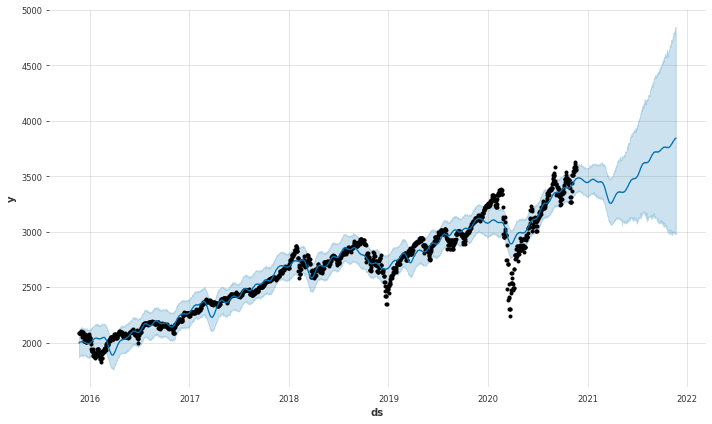

In [88]:
fig1 = model.plot(forecast)


In [89]:
plot_plotly(model, forecast)

In [90]:
plot_components_plotly(model, forecast)

c:\Users\basti\anaconda3\lib\site-packages\plotly\io\_json.py:469: UserWarning:

Discarding nonzero nanoseconds in conversion.



In [91]:
#1825

df_cv = cross_validation(model, initial='1460 days', period='1 days', horizon = '364 days')
df_cv.head()

  0%|          | 0/1 [00:00<?, ?it/s]

17:58:11 - cmdstanpy - INFO - Chain [1] start processing
17:58:12 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2019-11-23,3100.103765,3050.966697,3151.705854,3110.290039,2019-11-22
1,2019-11-24,3102.446942,3053.907161,3151.374131,3110.290039,2019-11-22
2,2019-11-25,3104.762401,3057.352442,3157.324769,3133.639893,2019-11-22
3,2019-11-26,3108.657264,3058.778890,3159.256067,3140.520020,2019-11-22
4,2019-11-27,3112.633745,3061.691777,3161.832557,3153.629883,2019-11-22


In [92]:
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,36 days,2622.302152,51.208419,40.229594,0.012583,0.008529,0.012705,0.722222
1,37 days,2901.889193,53.869186,42.747779,0.013357,0.009681,0.013492,0.694444
2,38 days,3084.875679,55.541657,44.794959,0.013990,0.010902,0.014134,0.666667
3,39 days,3279.288209,57.265070,46.451220,0.014495,0.011903,0.014649,0.638889
4,40 days,3454.116765,58.771734,47.940951,0.014948,0.012573,0.015110,0.611111


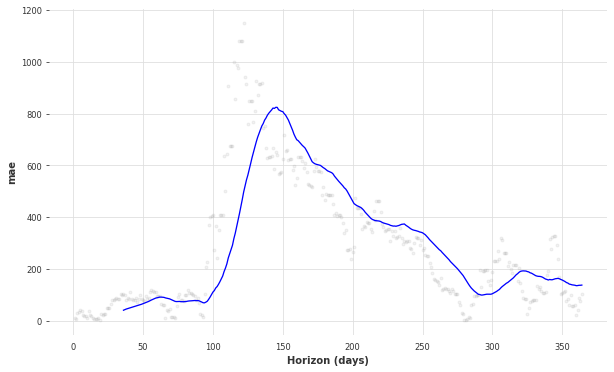

In [93]:
fig = plot_cross_validation_metric(df_cv, metric='mae')


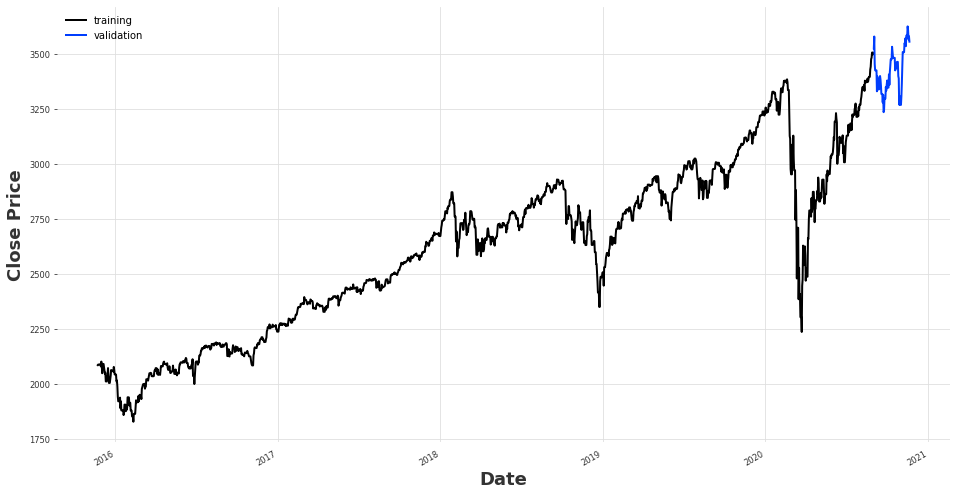

In [76]:
import pandas as pd
from darts.dataprocessing.transformers import Scaler
from darts import TimeSeries
from darts.models import ExponentialSmoothing
from darts.models import AutoARIMA
from darts.models import ARIMA
from darts.models import BlockRNNModel
import matplotlib.pyplot as plt

from darts.models import Prophet
from darts.metrics import mape

datasetName = "yahoo_stock.csv"
dataset = pd.read_csv(datasetName, sep=',')
dataset = dataset.drop(['Volume'], axis=1)

splitDay = '2020-09-01'


seriesClosed = TimeSeries.from_dataframe(dataset, 'Date', 'Close')
seriesOpen = TimeSeries.from_dataframe(dataset, 'Date', 'Open')
seriesHigh = TimeSeries.from_dataframe(dataset, 'Date', 'High')
seriesLow = TimeSeries.from_dataframe(dataset, 'Date', 'Low')
seriesAdjClosed = TimeSeries.from_dataframe(dataset, 'Date', 'Adj Close')

scalarClose, scalarOpen, scalarHigh, scalarLow, scalarAdjClosed = Scaler(), Scaler(), Scaler(), Scaler(), Scaler()

ScSeriesClosed = scalarClose.fit_transform(seriesClosed)
ScSeriesOpen = scalarOpen.fit_transform(seriesOpen)
ScSeriesHigh = scalarHigh.fit_transform(seriesHigh)
ScSeriesLow = scalarLow.fit_transform(seriesLow)
ScSeriesAdjClosed = scalarAdjClosed.fit_transform(seriesAdjClosed)


trainClosed, valClosed = seriesClosed.split_before(pd.Timestamp(splitDay))

ScTrainClosed, ScValClosed = ScSeriesClosed.split_before(pd.Timestamp(splitDay))
ScTrainOpen, ScValOpen = ScSeriesOpen.split_before(pd.Timestamp(splitDay))
ScTrainHigh, ScValHigh = ScSeriesHigh.split_before(pd.Timestamp(splitDay))
ScTrainLow, ScValLow = ScSeriesLow.split_before(pd.Timestamp(splitDay))
ScTrainAdjClosed, ScValAdjClosed = ScSeriesAdjClosed.split_before(pd.Timestamp(splitDay))


plt.figure(figsize=(16,8))
plt.title('Yahoo Stock Price Prediction')
trainClosed.plot(label="training")
valClosed.plot(label="validation")
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.legend()
plt.show()




In [77]:
model_LSTM = BlockRNNModel(
    model='LSTM',
    input_chunk_length=12,
    output_chunk_length =1,
    n_epochs=100,
    random_state=0
)
model_LSTM.fit(series =[ScTrainClosed, ScTrainOpen, ScTrainHigh, ScTrainLow, ScTrainAdjClosed])



GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | rnn           | LSTM             | 2.8 K 
4 | fc            | Sequential       | 26    
---------------------------------------------------
2.8 K     Trainable params
0         Non-trainable params
2.8 K     Total params
0.011     Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=100` reached.


BlockRNNModel(model=LSTM, hidden_dim=25, n_rnn_layers=1, hidden_fc_sizes=None, dropout=0.0, input_chunk_length=12, output_chunk_length=1, n_epochs=100, random_state=0)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Predicting: 0it [00:00, ?it/s]

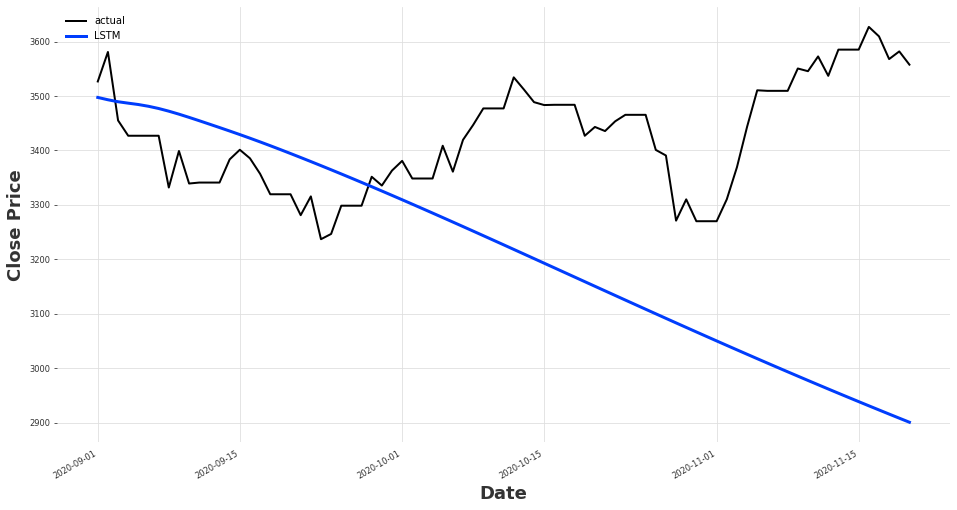

In [78]:
predictionLSTM = model_LSTM.predict(n=len(ScValClosed), series=ScTrainClosed)
predictionLSTM = scalarClose.inverse_transform(predictionLSTM)

plt.figure(figsize=(16,8))
plt.title('Yahoo Stock Price Prediction')
valClosed.plot(label='actual')
predictionLSTM.plot(label='LSTM', lw=3)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.legend()
plt.show()

In [79]:
"""
modelProphet = Prophet()
# Define the hyperparameters to search over
es_params = {
    'trend': ['additive', 'multiplicative', None],
    'seasonal': ['additive', 'multiplicative', None],
    'seasonal_periods': [7, 14, 28],
    'damped_trend': [True, False]
}

prophet_params = {
    'growth': ['linear', 'logistic'],
    'changepoint_prior_scale': [0.01, 0.1, 1],
    'seasonality_prior_scale': [0.01, 0.1, 1],
    'holidays_prior_scale': [0.01, 0.1, 1]
}

arima_params = {
    'p': range(0, 3),
    'd': range(0, 3),
    'q': range(0, 3)
}

# Inverse transform the predicted values
pred = scaler.inverse_transform(es_best_model.predict(len(valClosed_scaled)))

# Compute the MAPE score on the original scale
mape_score = mape(valClosed, pred)


print(f'ExponentialSmoothing Best MAPE: {es_best_mape:.2%}')
print(f'ExponentialSmoothing Best Model Parameters: {es_best_model.get_params()}')"""

"\nmodelProphet = Prophet()\n# Define the hyperparameters to search over\nes_params = {\n    'trend': ['additive', 'multiplicative', None],\n    'seasonal': ['additive', 'multiplicative', None],\n    'seasonal_periods': [7, 14, 28],\n    'damped_trend': [True, False]\n}\n\nprophet_params = {\n    'growth': ['linear', 'logistic'],\n    'changepoint_prior_scale': [0.01, 0.1, 1],\n    'seasonality_prior_scale': [0.01, 0.1, 1],\n    'holidays_prior_scale': [0.01, 0.1, 1]\n}\n\narima_params = {\n    'p': range(0, 3),\n    'd': range(0, 3),\n    'q': range(0, 3)\n}\n\n# Inverse transform the predicted values\npred = scaler.inverse_transform(es_best_model.predict(len(valClosed_scaled)))\n\n# Compute the MAPE score on the original scale\nmape_score = mape(valClosed, pred)\n\n\nprint(f'ExponentialSmoothing Best MAPE: {es_best_mape:.2%}')\nprint(f'ExponentialSmoothing Best Model Parameters: {es_best_model.get_params()}')"

17:58:01 - cmdstanpy - INFO - Chain [1] start processing
17:58:02 - cmdstanpy - INFO - Chain [1] done processing


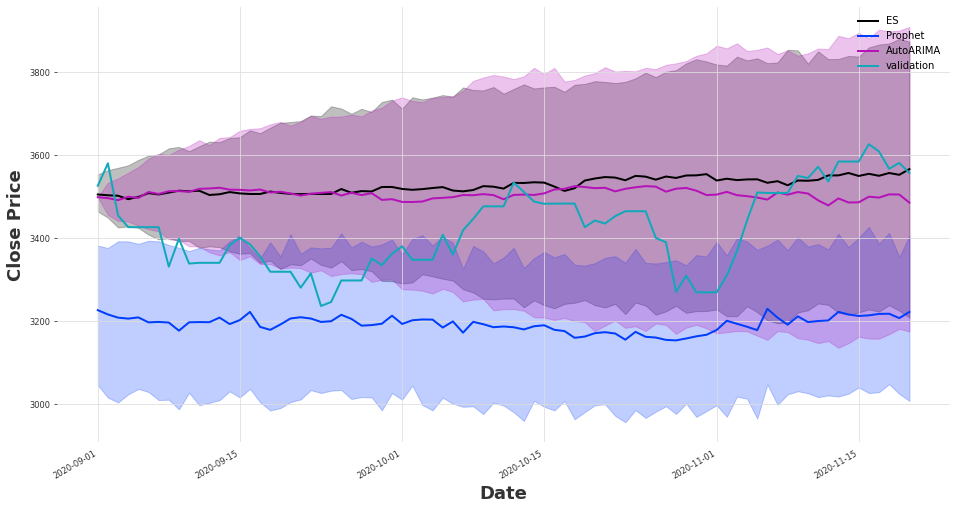

In [80]:
modelES = ExponentialSmoothing()
modelProphet = Prophet()
modelAutoARIMA = ARIMA()

modelES.fit(ScTrainClosed)
modelProphet.fit(ScTrainClosed)
modelAutoARIMA.fit(ScTrainClosed)

predictionES = modelES.predict(n=len(ScValClosed), num_samples = 200)
predictionProphet = modelProphet.predict(n=len(ScValClosed), num_samples = 200)
predictionAutoARIMA = modelAutoARIMA.predict(n=len(ScValClosed), num_samples = 200)

predictionES = scalarClose.inverse_transform(predictionES)
predictionProphet = scalarClose.inverse_transform(predictionProphet)
predictionAutoARIMA =scalarClose.inverse_transform(predictionAutoARIMA)

plt.figure(figsize=(16,8))
plt.title('Yahoo Stock Price Prediction')
predictionES.plot(label="ES")
predictionProphet.plot(label="Prophet")
predictionAutoARIMA.plot(label="AutoARIMA")
valClosed.plot(label="validation")
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.legend()
plt.show()


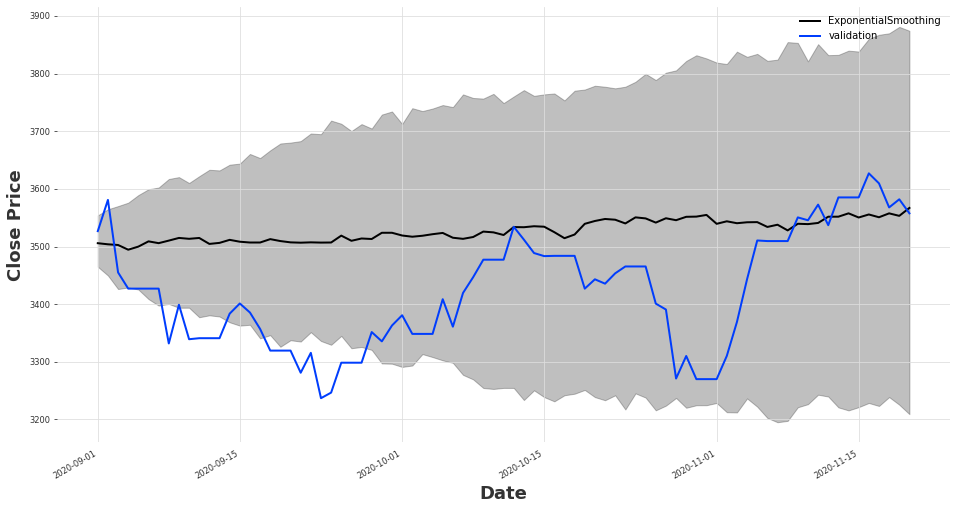

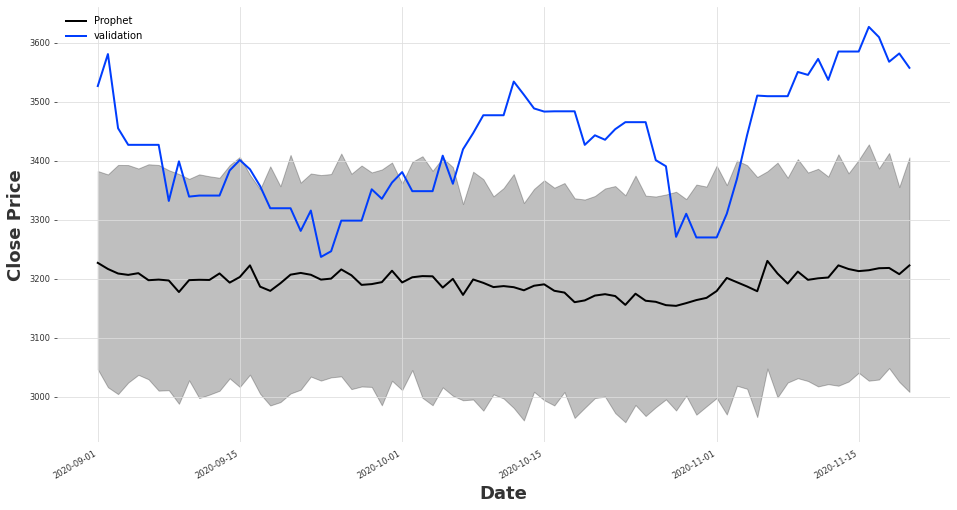

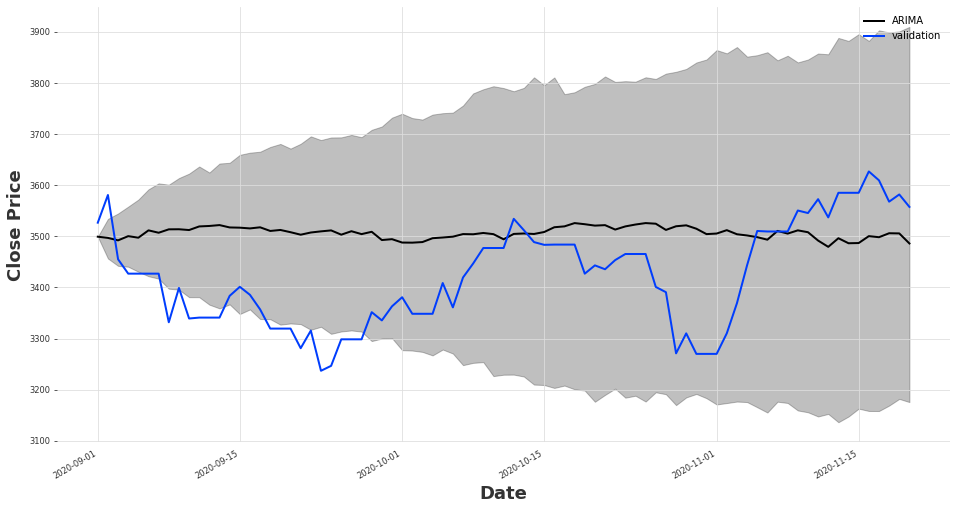

In [81]:
plt.figure(figsize=(16,8))
plt.title('Yahoo Stock Price Prediction')
predictionES.plot(label="ExponentialSmoothing")
valClosed.plot(label="validation")
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.legend()
plt.show()

plt.figure(figsize=(16,8))
plt.title('Yahoo Stock Price Prediction')
predictionProphet.plot(label="Prophet")
valClosed.plot(label="validation")
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.legend()
plt.show()

plt.figure(figsize=(16,8))
plt.title('Yahoo Stock Price Prediction')
predictionAutoARIMA.plot(label="ARIMA")
valClosed.plot(label="validation")
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.legend()
plt.show()


In [82]:
print("mape for LSTM:", mape(valClosed, predictionLSTM))
print("mape for ExponentialSmoothing:", mape(valClosed, predictionES))
print("mape for Prophet:", mape(valClosed, predictionProphet))
print("mape for ARIMA:", mape(valClosed, predictionAutoARIMA))

mape for LSTM: 7.189526081303903
mape for ExponentialSmoothing: 3.4231087386096473
mape for Prophet: 6.619272485568429
mape for ARIMA: 3.318138604066979


2020-07-01


2020-08-01


2020-09-01

mape for LSTM: 7.189526081303903

mape for ExponentialSmoothing: 3.4231087386096473

mape for Prophet: 6.619272485568429

mape for ARIMA: 3.318138604066979

2020-10-01

mape for LSTM: 3.0333970985843814

mape for ExponentialSmoothing: 3.2037278545615373

mape for Prophet: 6.307871604480976

mape for ARIMA: 3.2082107484632494


2020-11-01

mape for LSTM: 5.975442049838423

mape for ExponentialSmoothing: 6.855195774686528

mape for Prophet: 6.499908997262247

mape for ARIMA: 6.789119820592027

2020-12-01
